In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from scipy.optimize import minimize as minimize
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
from lmfit import Model
from functools import partial
from copy import deepcopy
%matplotlib notebook

In [2]:
ds = [0.0,0.3,0.5,1.0]
files = [f"6_angle_{i:.1f}mm.csv" for i in ds]

In [3]:
def read_file(name):
    data = pd.read_csv(name)
    N = unumpy.uarray(data.N,np.sqrt(data.N))
    t = unumpy.uarray(data.t,np.ones(data.t.shape[0]))
    theta = unumpy.uarray(data.angle,np.ones(data.angle.shape[0]))
    I = N/t
    a = lambda : None
    a.I = I
    a.theta = theta
    return a

In [4]:
data = [read_file(i) for i in files]

<IPython.core.display.Javascript object>


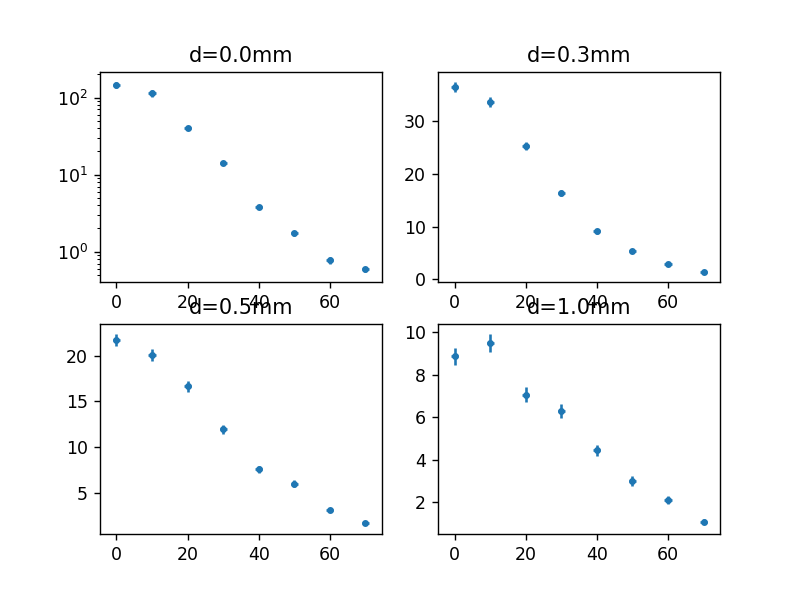

In [5]:
fig, axes = plt.subplots(2,2)
for i,d in enumerate(data):
    ax = axes[i//2,i%2]
    ax.errorbar(nv(d.theta),nv(d.I),yerr=sd(d.I),xerr=sd(d.theta),fmt='.')
    ax.set_title(f"d={ds[i]:.1f}mm")
axes[0,0].set_yscale('log')

I expect that plot 0 should be a gaussian, .3 also. 1.0mm should be the cos^2

# Convolved fits

In [30]:
def cos2_conv(x,A):
    y = np.zeros(x.shape)
    for i,xi in enumerate(x):
        thetas = np.pi/180 * xi-nv(data[0].theta[1:])
#         print(thetas)
        y[i] = np.sum(A*np.cos(thetas)**2*nv(data[0].I[1:]))
#         print(y)
    return y

<IPython.core.display.Javascript object>


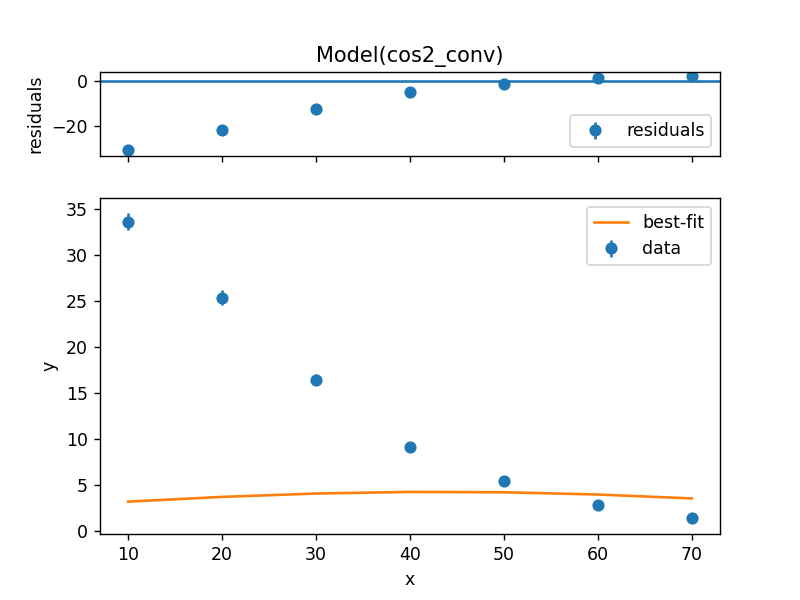

<IPython.core.display.Javascript object>


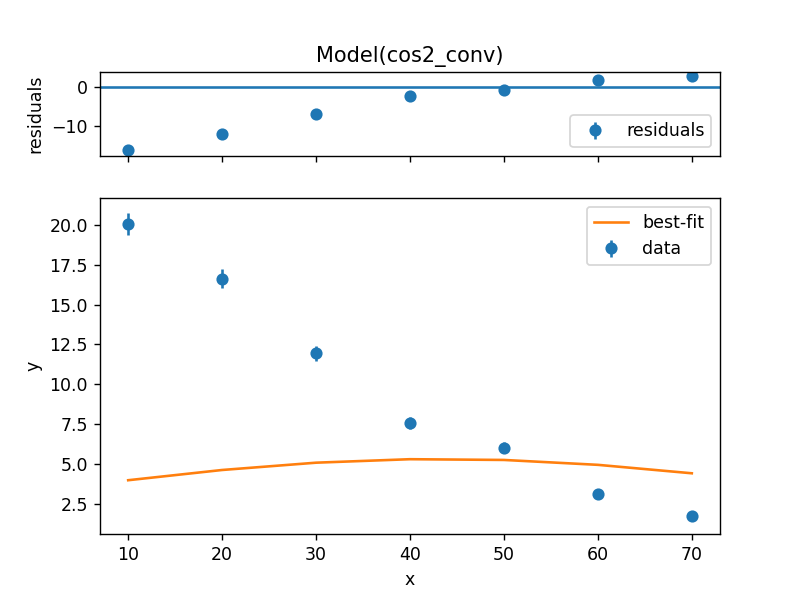

<IPython.core.display.Javascript object>


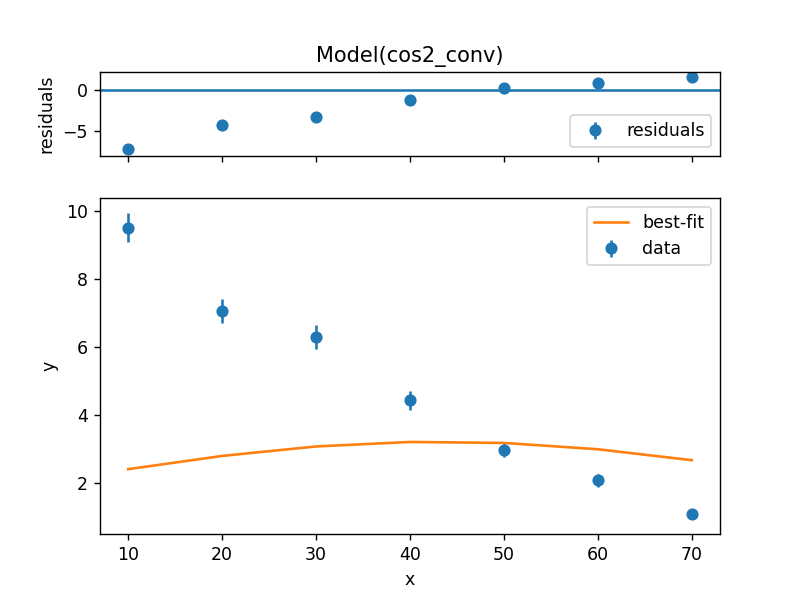

In [31]:
modelc2c = Model(cos2_conv)
for i in range(1,4):
    fig = plt.figure()
    res = modelc2c.fit(nv(data[i].I[1:]),x=nv(data[i].theta[1:]),A=nv(data[i].I).max(),weights=1/sd(data[i].I[1:]))
    res.plot(fig=fig)